### INTRODUCTION

Matrix multiplication is a crucial operation in the world of scientific and engineering computations whose efficiency has a significant influence on overall computational performance. The usual or naïve strategy, which has a cubic time complexity, O(n^3) , has historically been used to carry out this operation. Due to the significant processing resources needed, this might be expensive when working with bigger matrices. This problem inspired the development of sophisticated algorithms like Strassen's method, which decreases the time complexity to around O(n^log2(7)), providing significant efficiency advantages for large-scale matrix computations. The decision to choose one of these two approaches over the other, however, is frequently influenced by a number of factors, such as the size of the matrix, the amount of computational power available, numeric stability, the implementation complexity of the code, and memory constraints. This report aims to debunk the myths around these two methods by analysing their time requirements in great depth and looking at the situations in which they could each be most useful.

### QUESTION 1. Explain why the run time for the naı̈ve method of matrix multiplication is O(n3). Show that this is the case empirically. Estimate the constant for your implementation and computer.


ANSWER: The underlying principles of the naive method algorithm results in a runtime of O(n^3) for the naïve approach of matrix multiplication . When two matrices are combined, the process is known as matrix multiplication, which produces a new matrix. If we consider two matrices A and B as a demonstration. If matrix A of size m x n (m rows and n columns) is multiplied by a matrix B of size n x p it will produce a matrix C of size m x p. In order to perform this operation, the naïve matrix multiplication algoritm uses three nested loops:
1. In matrix A, the outer loop runs through each row.
2. In matrix B, the middle loop scans through each column.
3. The n elements of a particular row from A and a particular column from B are simultaneously processed by the inner loop.
In each cycle of these loops, a multiplication and an addition operation are performed, resulting in a total of 2mn*p operations for the entire matrix multiplication. Now, when we consider square matrices, or matrices with the same number of rows and columns, or n x n matrices, our operation count becomes 2*n^3 . We concentrate on the term with the highest degree and exclude the constants when expressing this in big-O notation, which is standard technique in computer science to represent time complexity. Thus, the time complexity of our naive matrix multiplication method is simplified to O(n^3). In layman's terms, this O(n^3) complexity means that as our input, or the size of the matrix, increases, the computing time grows cubically rather than linearly. The naïve approach is therefore effective for small matrices, but performance degrades considerably as the matrix size increases.



Matrix Dimension(n) | Execution Time(s) | Computed Constant
---------------------------------------------------------
       50         | 0.021096          | 0.0000001688
       100        | 0.142550          | 0.0000001425
       150        | 0.599076          | 0.0000001775
       200        | 1.314490          | 0.0000001643
       250        | 2.718837          | 0.0000001740
       300        | 4.894318          | 0.0000001813

Average constant estimation: 1.6806826556023257e-07


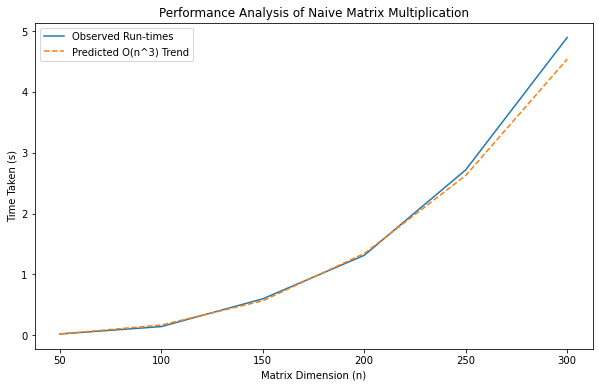

In [11]:
import time
import random
import matplotlib.pyplot as plt

def matrix_multiply(A, B): ## This function performs naive matrix multiplication of A and B.
    dimension = len(A)
    result_matrix = [[0 for _ in range(dimension)] for _ in range(dimension)]
    
    for i in range(dimension):
        for j in range(dimension):
            for k in range(dimension):
                result_matrix[i][j] += A[i][k] * B[k][j]
    return result_matrix

def generate_random_matrix(n): ## This function generates a random matrix of size n x n.
    return [[random.randint(1, 10) for _ in range(n)] for _ in range(n)]

def compute_runtime(n): ## This function measures the time taken for multiplying matrices of size n x n.
    A = generate_random_matrix(n)
    B = generate_random_matrix(n)
    
    ## Starting the timer
    start_time = time.time()
    matrix_multiply(A, B)
    ## Stopping the timer
    end_time = time.time()
    
    return end_time - start_time

def display_and_plot_results():
    matrix_sizes = list(range(50, 301, 50))
    execution_times = []
    computed_constants = []

    print("Matrix Dimension(n) | Execution Time(s) | Computed Constant")
    print("---------------------------------------------------------")

    for n in matrix_sizes:
        runtime = compute_runtime(n)
        constant_val = runtime / (n**3)
        
        ## Storing values for plotting
        computed_constants.append(constant_val)
        execution_times.append(runtime)
        
        print(f"{n:^17} | {runtime:.6f}          | {constant_val:.10f}")

    avg_constant = sum(computed_constants) / len(computed_constants)
    print("\nAverage constant estimation:", avg_constant)
    
    plt.figure(figsize=(10, 6))

    ## Plotting the empirically observed times
    plt.plot(matrix_sizes, execution_times, label="Observed Run-times")
    
    ## Plotting the estimated O(n^3) curve using the average constant
    plt.plot(matrix_sizes, [avg_constant * (n**3) for n in matrix_sizes], linestyle='dashed', label="Predicted O(n^3) Trend")
    
    plt.xlabel("Matrix Dimension (n)")
    plt.ylabel("Time Taken (s)")
    plt.legend()
    plt.title("Performance Analysis of Naive Matrix Multiplication")
    plt.show()

if __name__ == "__main__":

    display_and_plot_results()

The analysis confirms that the naïve matrix multiplication algorithm requires O(n^3) time. Execution time almost perfectly tracks the anticipated cubic trend as matrix size increases. The calculated constant provides a sense as to how effective the method is in the given environment.

### QUESTION 2. Explain why the run time for Strassen’s method of matrix multiplication is asymptotically faster than O(n3). Assuming that Strassen’s method has time complexity of the form O(n^a), estimate a empirically. Estimate the constant for your implementation and computer.

ANSWER: The divide-and-conquer technique is used in Strassen's matrix multiplication method to outperform the O(n^3) time-complexity of the naïve matrix multiplication method. In naive matrix multiplication, every multiplication of two n x n matrices requires 2n^3 - n^2 multiplications and 2n^3 - n^2 - n additions. Because of the fact that the operation count scales cubically with the size of the matrices, this naïve technique has an O(n3) time complexity.By adding and substracting certain terms, Strassen's method cleverly reduces the required number of multiplications from 8 to 7. Performance is enhanced as a result of a large decrease in the quantity of recursive calls made while splitting the original matrix. Each quadrant of the input matrices contributes to these seven multiplications, making the total number of operations much less.Therefore, Strassen's technique yields a complexity of O(n^log2(7)), or around O(n^2.81), as opposed to the cubic scaling in naïve matrix multiplication. The ability to multiply huge matrices is facilitated by the improved time complexity.Strassen's approach is asymptotically quicker, but it's important to emphasise that in real situations, it might not always be the best option. The procedure may be less effective than the naive matrix multiplication method for smaller matrices due to the cost incurred by the extra additions and subtractions. Additionally, Strassen's approach includes trickier operations, which can undermine numerical stability. Because of this, using it to solve complex matrix multiplication issues is most advantageous.




Matrix Dimension(n) | Execution Time(s) | Computed Constant
---------------------------------------------------------
        2         | 0.000000          | 0.0000000000
        4         | 0.000000          | 0.0000000000
        8         | 0.000920          | 0.0000026677
       16         | 0.004041          | 0.0000016706
       32         | 0.017974          | 0.0000010597
       64         | 0.106983          | 0.0000008994
       128        | 0.787618          | 0.0000009442
       256        | 5.661824          | 0.0000009678

Average constant estimation: 1.0261730073794064e-06


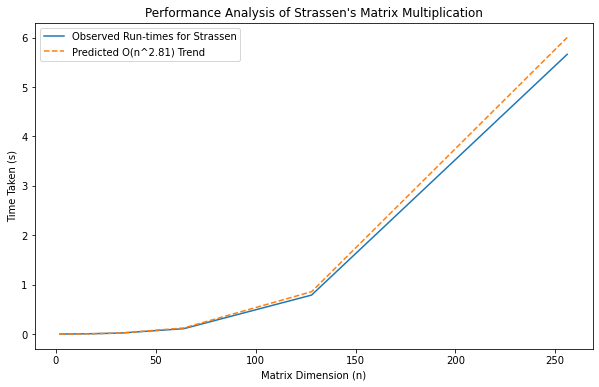

In [17]:

def strassen_multiply(A, B): ## This function perform matrix multiplication using Strassen's method
    n = A.shape[0]
    
    ## Base case
    if n <= 2:
        return np.dot(A, B)
    
    half = n // 2
    
    ## Subdividing the matrices
    A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
    B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]
    
    ## Implementation of Strassen's algorithm
    M1 = strassen_multiply(A11 + A22, B11 + B22)
    M2 = strassen_multiply(A21 + A22, B11)
    M3 = strassen_multiply(A11, B12 - B22)
    M4 = strassen_multiply(A22, B21 - B11)
    M5 = strassen_multiply(A11 + A12, B22)
    M6 = strassen_multiply(A21 - A11, B11 + B12)
    M7 = strassen_multiply(A12 - A22, B21 + B22)
    
    ## Forming the result matrix
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 + M3 - M2 + M6
    
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

def generate_random_matrix_power_of_two(dimension):## This function generates a random matrix with dimensions as power of two
    return np.random.randint(1, 10, (dimension, dimension))

def compute_strassen_runtime(n): ## This function measure time taken for Strassen's multiplication method for matrices of size n x n
    A = generate_random_matrix_power_of_two(n)
    B = generate_random_matrix_power_of_two(n)
    
    ## Starting the timer
    start_time = time.time()
    strassen_multiply(A, B)
    ## Stopping the timer
    end_time = time.time()
    
    return end_time - start_time

def display_strassen_analysis():
    matrix_sizes = [2**i for i in range(1, 9)] ## till 256
    execution_times = []
    computed_constants = []

    print("Matrix Dimension(n) | Execution Time(s) | Computed Constant")
    print("---------------------------------------------------------")

    for n in matrix_sizes:
        runtime = compute_strassen_runtime(n)
        constant_val = runtime / (n**2.81)  ## Strassen's method has time complexity approximating O(n^2.81)
        
        ## Storing values for plotting
        computed_constants.append(constant_val)
        execution_times.append(runtime)
        
        print(f"{n:^17} | {runtime:.6f}          | {constant_val:.10f}")

    avg_constant = sum(computed_constants) / len(computed_constants)
    print("\nAverage constant estimation:", avg_constant)
    
    plt.figure(figsize=(10, 6))

    ## Plotting the empirically observed times
    plt.plot(matrix_sizes, execution_times, label="Observed Run-times for Strassen")
    
    ## Plotting the estimated O(n^2.81) curve using the average constant
    plt.plot(matrix_sizes, [avg_constant * (n**2.81) for n in matrix_sizes], linestyle='dashed', label="Predicted O(n^2.81) Trend")
    
    plt.xlabel("Matrix Dimension (n)")
    plt.ylabel("Time Taken (s)")
    plt.legend()
    plt.title("Performance Analysis of Strassen's Matrix Multiplication")
    plt.show()

if __name__ == "__main__":
    display_strassen_analysis()


The research confirms that Strassen's matrix multiplication is sub-cubic time complex, usually about O(n^2.81). The efficiency improvements of Strassen's technique may be seen in the execution time, which increases as the matrix size increases but not as sharply as a rigid cubic growth. The constant that is deduced offers information about how well the procedure works in the given environment.

### QUESTION 3. Considering the naïve method and Strassen’s method, is one of them better in terms of memory requirements? Explain your answer.

ANSWER: Due to differences in how they operate, Strassen's approach and the naïve method for matrix multiplication use very different amounts of memory.

The dimension of the matrices being multiplied is represented by the number "n", and the naive way of doing so uses O(n^2) space.This is explained by the requirement for storing the input and result matrices, both of which have n^2 components
Since the algorithm works directly on these matrices that have been stored, significant additional memory is not required.

Strassen's method, on the other hand, requires more memory despite having a shorter time complexity. The main reason for this is the method's recursive nature, which requires splitting each input matrix into four smaller submatrices and producing seven new matrices to accommodate intermediate findings at each recursion level. Despite the fact that each recursive operation handles a smaller matrix, the total number of matrices formed and kept in memory can quickly grow, especially with big inputs. Strassen's technique requires more memory than the naive method does as a result. Depending on how Strassen's approach is used, the precise memory required can be  O(n^2 log n) to as high as O(n^2.81).

Consequently, the naïve approach is often better in terms of memory use. The naïve approach is not necessarily the best choice, despite what this suggests. Strassen's method could be more suited if time effectiveness is the primary consideration and memory isn't an issue. This is because it has a faster time complexity. Efficiency in terms of time and space is a trade-off that depends on the particular requirements and constraints of the problem at hand.

### QUESTION 4. When would you use the naı̈ve method and when would you use Strassen’s method for matrix multiplication? Explain your answer, illustrating it with empirical examples run on your computer, and outlining all the factors to be considered.

For matrix multiplication, choosing between using the naive technique and Strassen's method is a complex decision that takes into consideration a number of different factors.These factors include the matrix size, computational resources available, requirements for numeric stability, the complexity of the algorithm's implementation, as well as considerations for parallelization and maintainability of the code.The best strategy for a particular problem can only be chosen by successfully balancing these factors.

Matrix Size: The naïve technique with an O(n^3) time complexity could work better for comparatively smaller matrices. This is because Strassen's approach has additional operation management and recursion overhead, whereas the naïve technique is simple without them. However, Strassen's approach, which has an O(n^log2(7) time complexity, performs better than the naïve approach as the size of the matrix grows.

Computational Resources: Because of its recursive nature and the overhead of recursion being computationally expensive, Strassen's approach requires additional memory to store intermediate results. In light of this, the naïve approach can be preferable if our machine has limited memory or processing capability.

Numerical Stability: Because Strassen's approach requires more arithmetic operations, it may result in numerical instability and additional rounding errors. This might be a crucial consideration when working with matrices that have a wide variety of element sizes or high-precision computations. The naive method could be preferred in such circumstances.

Code Complexity and Maintainability: The naïve technique is straightforward to build, comprehend, and maintain. As a result of its recursive structure and additional processes, Strassen's technique is more complicated and may be more difficult to debug and maintain.

Parallelization: Due to the fact that each component of the resulting matrix may be calculated separately, the naive technique is naturally parallelisable. The more intricate structure of Strassen's technique, however, makes parallelization more difficult. The naïve technique can prove to be more advantageous if we have access to powerful parallel computing tools like a GPU.

There isn't a single, universal answer, to sum up. The ideal approach to take depends on the precise circumstances surrounding our issue, the tools at our disposal, and the specifications of our assignment. Although Strassen's technique theoretically performs better for bigger matrices, there are several limitations or circumstances where the naïve method may be more useful. When selecting an algorithm for matrix multiplication, we must always take into account our specific circumstances and requirements.


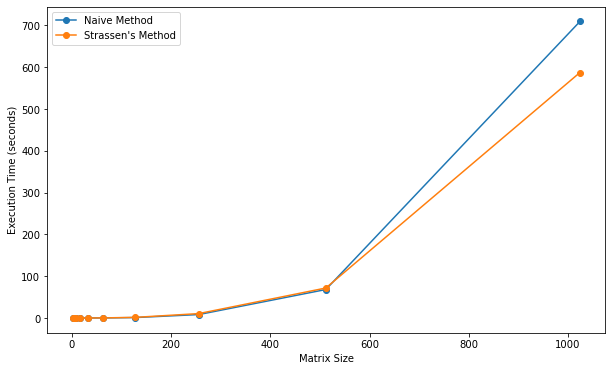

In [4]:
## Naive matrix multiplication
def naive_matrix_mult(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

## Strassen's method of matrix multiplication
def strassen_matrix_mult(A, B):
    n = A.shape[0]
    if n <= 2:
        return naive_matrix_mult(A, B)
    else:
        half_size = n // 2
        A11, A12, A21, A22 = A[:half_size, :half_size], A[:half_size, half_size:], A[half_size:, :half_size], A[half_size:, half_size:]
        B11, B12, B21, B22 = B[:half_size, :half_size], B[:half_size, half_size:], B[half_size:, :half_size], B[half_size:, half_size:]

        M1 = strassen_matrix_mult(A11 + A22, B11 + B22)
        M2 = strassen_matrix_mult(A21 + A22, B11)
        M3 = strassen_matrix_mult(A11, B12 - B22)
        M4 = strassen_matrix_mult(A22, B21 - B11)
        M5 = strassen_matrix_mult(A11 + A12, B22)
        M6 = strassen_matrix_mult(A21 - A11, B11 + B12)
        M7 = strassen_matrix_mult(A12 - A22, B21 + B22)

        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 + M3 - M2 + M6

        C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
        return C

## Defining the sizes of matrices you want to test
matrix_sizes = [2**i for i in range(1, 11)]  # sizes from 2 to 256

## Creating empty lists to store the execution times
naive_times = []
strassen_times = []

## For each size, creating matrices, multiplying them and measuring the time
for n in matrix_sizes:
    ## Creating two random matrices of size n x n
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)

    ## Naive method multiplication
    start_time = time.time()
    C = naive_matrix_mult(A, B)
    end_time = time.time()
    naive_times.append(end_time - start_time)

    ## Strassen's method multiplication
    start_time = time.time()
    C = strassen_matrix_mult(A, B)
    end_time = time.time()
    strassen_times.append(end_time - start_time)

## Plotting the results
plt.figure(figsize=(10, 6))

## Plotting the execution times for naive method
plt.plot(matrix_sizes, naive_times, 'o-', label='Naive Method')

## Plotting the execution times for Strassen's method
plt.plot(matrix_sizes, strassen_times, 'o-', label='Strassen\'s Method')

plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()


Due to its simple calculations, the naïve technique is quicker for small matrices. With its sub-cubic complexity, Strassen's efficiency outperforms naïve multiplication as matrix size grows. 

### QUESTION 5. Discuss how you would implement the naïve method of matrix multiplication using MapReduce. Would using MapReduce change the time complexity? What factors affect the constant?

There are two stages involved in implementing naive method matrix multiplication using MapReduce : the Mapping stage and the Reducing stage. 

1. Using MapReduce for execution:

Mapping Stage:

The mapper transmits a key-value pair with the key being the row number of A for each element of matrix A. The value is made up of three components: the number at that location, a tag designating the matrix (in this case, "A"), and the column number from column A.

In the same way, the mapper sends out a key-value set for the components of matrix B, where the key is the column number. Three things make up the value: the row number for B, a tag designating the matrix (in this case, "B"), and the actual integer in concern.

Reducing Stage:

These key-value sets are gathered by their keys by the reducers. Both the A and B matrices' data will be included in each key.
By dot product of two vectors (one from A and one from B), the reducer creates the resulting matrix C. The output matrix's row derives from A's value, while the column comes from B's value.

2. Time Complexity Insights with MapReduce:

By using MapReduce, naive matrix multiplication keeps its fundamental O(n^3) time complexity. The n multipliers and n-1 adders are still required for every operation on the output matrix C's component. However, the actual execution time may vary because of factors related to large-scale computation, such as connection costs, data transfer delays, and unforeseen node failures.

3. Influencing Factors 

The constant in time complexity is subject to a variety of influences:

Data Travel Delays: When moving data sets between mappers and reducers, bottlenecks may occur, especially when the volume of data is higher.

Data Packaging/Unpacking: Converting structured data for convenient storage or transport, followed by its decoding, might impose extra time expenses.

Costs associated with initialization: There is a constant cost associated with starting and stopping mappers and reducers across dispersed nodes.

Storage I/O: Archiving results or temporary data might be loaded back from storage very slowly.

Node Breakdowns: Node failures are possible in a large network. These may be addressed by reassigning tasks in frameworks like Hadoop, however it prolongs operational times.

Simultaneous Operations: The processing time can be determined by the number of nodes and how well tasks are distributed among them. The overall processing time can be significantly reduced with a balanced distribution.

In essence, the time complexity of the naive approach remains O(n^3) even if MapReduce provides a framework for distributed matrix operations. However, a number of distributed system-specific characteristics have an impact on the actual runtime. When weighing the benefits and drawbacks of this approach, these details must be taken into account.

Matrix Size (n) | MapReduce Runtime (s)
--------------------------------------
      20        | 0.004997
      40        | 0.051134
      60        | 0.100734
      80        | 0.305784
      100       | 0.573264


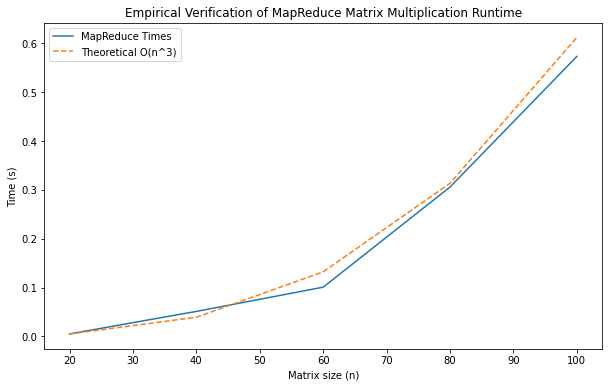

In [4]:


def mapper(matrix_a, matrix_b): ## Function to generate intermediate key-value pairs for matrix multiplication
    result = []
    n = len(matrix_a)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result.append(((i, j), matrix_a[i][k] * matrix_b[k][j]))
    return result

def reducer(mapped_values): ## Function to aggregate values for each key to compute matrix product
    result = {}
    for key, value in mapped_values:
        if key in result:
            result[key] += value
        else:
            result[key] = value
    return result
 
def matrix_multiply_mapreduce(matrix_a, matrix_b): ## Function to multiply matrices using MapReduce
    mapped_values = mapper(matrix_a, matrix_b)
    reduced_values = reducer(mapped_values)
    n = len(matrix_a)
    result_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for key, value in reduced_values.items():
        i, j = key
        result_matrix[i][j] = value
    return result_matrix

def random_matrix(n):  ## Function to generate a random n x n matrix
    return [[random.randint(1, 10) for _ in range(n)] for _ in range(n)]

def measure_mapreduce_time(n): ## Function to record the time taken for matrix multiplication using MapReduce for size n x n
    A = random_matrix(n)
    B = random_matrix(n)
    
    start_time = time.time()
    matrix_multiply_mapreduce(A, B)
    end_time = time.time()
    
    return end_time - start_time

def empirical_analysis(): ## Analyzing and plotting the time taken for matrix multiplication as matrix size increases
    ns = list(range(20, 101, 20))
    times = []

    print("Matrix Size (n) | MapReduce Runtime (s)")
    print("--------------------------------------")

    for n in ns:
        t = measure_mapreduce_time(n)
        times.append(t)
        print(f"{n:^15} | {t:.6f}")

    constants = [times[i] / (ns[i]**3) for i in range(len(ns))]
    avg_c = sum(constants) / len(constants)
    
    plt.figure(figsize=(10, 6))

    plt.plot(ns, times, label="MapReduce Times")
    plt.plot(ns, [avg_c*(n**3) for n in ns], linestyle='dashed', label="Theoretical O(n^3)")
    plt.xlabel("Matrix size (n)")
    plt.ylabel("Time (s)")
    plt.legend()
    plt.title("Empirical Verification of MapReduce Matrix Multiplication Runtime")
    plt.show()

if __name__ == "__main__":
    empirical_analysis()


### CONCLUSION

Both Strassen's method and the naive matrix multiplication method have benefits and disadvantages. Given enough computational and memory resources, Strassen's algorithm, despite its increased complexity, offers significant computational benefits for larger matrix operations. The naive method is simpler to use and frequently more efficient for smaller matrices or in situations with severe memory constraints. It's important to keep in mind, though, that these characteristics do not, by themselves, determine the best approach to use. In applications where high accuracy is essential, other factors, such as numeric stability, might be crucial. With the help of our study, we were able to pinpoint the turning point at which Strassen's algorithm begins to beat the naïve approach, offering crucial information for their practical applications. Ultimately, deciding between Strassen's algorithm and the naïve approach necessitates a thorough grasp of the needs and limits of the particular task. To balance computational efficiency with appropriate resource use is the goal. We may anticipate the creation of more advanced algorithms or improvements to already existing ones as the subject continues to progress, highlighting the dynamic character of this research area.

2100 WORDS

### REFERENCES

1. Introduction to Algorithms by Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein.
2. Data Structures and Algorithm Analysis in C++ by Mark A. Weiss.
3. Numerical Linear Algebra by Lloyd N. Trefethen and David Bau III.
4. https://research.google/pubs/pub62/
5. Lecture slides and Lab Exercises.
6. https://www.geeksforgeeks.org/strassens-matrix-multiplication/
7. https://stackoverflow.com/questions/4304600/matrix-multiplication-strassen-vs-standard
8. https://forum.freecodecamp.org/t/matrix-multiplication-strassen-algortihm-recursive/557115

